### NETWORKING NETWORK INTRUSION DETECTION 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize']=10,7
plt.rcParams['axes.grid']=False

import seaborn as sn


import warnings
warnings.filterwarnings('ignore')

In [2]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot",
         "num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root",
         "num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", 
         "is_guest_login","count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate",
         "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count",
         "dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
         "dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack",
         "last_flag"]

train_data=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Network Intrusion\\NSL_Dataset\\Train.txt",header=None,names=columns)
test_data=pd.read_csv("C:\\Users\\tavleen kaur\\Desktop\\0b. Assignments & Case Studies\\New folder (2)\\Network Intrusion\\NSL_Dataset\\Test.txt",header=None,names=columns)

## DATA AUDIT

In [3]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
train_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
train_data.shape

(125973, 43)

In [6]:
train_data.isna().sum().sum()

0

In [7]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

## Now, splitting the data for better clarity and to perform actions

In [9]:
train_data_cont=train_data.loc[:,((train_data.dtypes=='int64')|(train_data.dtypes=='float64')|(train_data.dtypes=='int32')|(train_data.dtypes=='float32'))]
train_data_cat=train_data.loc[:,( train_data.dtypes=='object')]

In [10]:
train_data_cont.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [11]:
train_data_cat.head()

,protocol_type,service,flag,attack
0,tcp,ftp_data,SF,normal
1,udp,other,SF,normal
2,tcp,private,S0,neptune
3,tcp,http,SF,normal
4,tcp,http,SF,normal


In [12]:
train_data_cont.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'last_flag'],
      dtype='object')

In [13]:
train_data_cat.shape

(125973, 4)

In [14]:
## creating UDF to get detailed nderstanding of continous variables
def continous_summary(x):
    return pd.Series([x.count(), x.isna().sum(), x.sum(), x.min(), x.std(),x.var(),x.mean(), x.median() , x.quantile(.01),
                       x.quantile(0.05), x.quantile(0.1), x.quantile(0.25), x.quantile(0.50),
                        x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                    
                      index=['COUNT','MISS','SUM', 'MIN','STD','VAR','MEAN', 'MEDIAN', 'P1',
                              'P5','P10' ,'P25', 'P50','P75','P90','P95','P99', 'MAX'])

In [15]:
train_data_cont.apply(continous_summary).T.round(2)

,COUNT,MISS,SUM,MIN,STD,VAR,MEAN,MEDIAN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,3.617247e+07,0.0,2604.52,6.783500e+06,287.14,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.56,4.290800e+04
src_bytes,125973.0,0.0,5.740179e+09,0.0,5870331.18,3.446079e+13,45566.74,44.00,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125973.0,0.0,2.491634e+09,0.0,4021269.15,1.617061e+13,19779.11,0.00,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
land,125973.0,0.0,2.500000e+01,0.0,0.01,0.000000e+00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.0,2.858000e+03,0.0,0.25,6.000000e-02,0.02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.0,1.400000e+01,0.0,0.01,0.000000e+00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.0,2.575000e+04,0.0,2.15,4.620000e+00,0.20,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125973.0,0.0,1.540000e+02,0.0,0.05,0.000000e+00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.0,4.985200e+04,0.0,0.49,2.400000e-01,0.40,0.00,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125973.0,0.0,3.517800e+04,0.0,23.94,5.732200e+02,0.28,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [16]:
def categorical_summary(x):
    Mode=x.value_counts().sort_values(ascending=False).reset_index().head(1)
    return pd.Series([x.count(), x.isna().sum(),Mode.iloc[0,0], Mode.iloc[0,1],
                       round(((Mode.iloc[0,1]*100)/x.count()),2)],
                      
                      index=['COUNT','MISS','MODE','FREQ','PERCENT'])

In [17]:
train_data_cat.apply(categorical_summary).T

,COUNT,MISS,MODE,FREQ,PERCENT
protocol_type,125973,0,tcp,102689,81.52
service,125973,0,http,40338,32.02
flag,125973,0,SF,74945,59.49
attack,125973,0,normal,67343,53.46


In [18]:
train_data_cat.protocol_type.unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [19]:
train_data_cat.service.unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [20]:
train_data_cat.flag.unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [21]:
train_data_cat.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

## DEFINING THE TARGET VARIABLE

In [22]:
train_data_cat.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [23]:
train_data_cat['Activity']=np.where((train_data_cat.attack.isin (['neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'])==True), 1, 0 )

In [24]:
train_data_cat['Activity'].unique()

array([0, 1])

In [25]:
train_data_cat['Activity'].value_counts()

0    67343
1    58630
Name: Activity, dtype: int64

## OUTLIERS TREATMENT

In [26]:
train_data_cont=train_data_cont.apply(lambda x: x.clip(lower=x.dropna().quantile(0.03), upper=x.quantile(0.97)))

In [27]:
train_data_cont.apply(continous_summary).T.round(2)

,COUNT,MISS,SUM,MIN,STD,VAR,MEAN,MEDIAN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125973.0,0.0,1.650770e+05,0.00,5.85,34.24,1.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,31.00,31.00
src_bytes,125973.0,0.0,3.608655e+07,0.00,599.39,359266.96,286.46,44.00,0.00,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,2974.00,2974.00
dst_bytes,125973.0,0.0,1.395691e+08,0.00,2624.46,6887792.82,1107.93,0.00,0.00,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,11714.68,11714.68
land,125973.0,0.0,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
wrong_fragment,125973.0,0.0,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
urgent,125973.0,0.0,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
hot,125973.0,0.0,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_failed_logins,125973.0,0.0,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
logged_in,125973.0,0.0,4.985200e+04,0.00,0.49,0.24,0.40,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
num_compromised,125973.0,0.0,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Dropping variables on basis of only zeros

In [28]:
for i in train_data_cont:
    print("non_Zeros in",i,':',(np.count_nonzero(train_data_cont[i])))

non_Zeros in duration : 10018
non_Zeros in src_bytes : 76581
non_Zeros in dst_bytes : 58006
non_Zeros in land : 0
non_Zeros in wrong_fragment : 0
non_Zeros in urgent : 0
non_Zeros in hot : 0
non_Zeros in num_failed_logins : 0
non_Zeros in logged_in : 49852
non_Zeros in num_compromised : 0
non_Zeros in root_shell : 0
non_Zeros in su_attempted : 0
non_Zeros in num_root : 0
non_Zeros in num_file_creations : 0
non_Zeros in num_shells : 0
non_Zeros in num_access_files : 0
non_Zeros in num_outbound_cmds : 0
non_Zeros in is_host_login : 0
non_Zeros in is_guest_login : 0
non_Zeros in count : 125973
non_Zeros in srv_count : 125973
non_Zeros in serror_rate : 39144
non_Zeros in srv_serror_rate : 37219
non_Zeros in rerror_rate : 16190
non_Zeros in srv_rerror_rate : 16206
non_Zeros in same_srv_rate : 125973
non_Zeros in diff_srv_rate : 49756
non_Zeros in srv_diff_host_rate : 28399
non_Zeros in dst_host_count : 125973
non_Zeros in dst_host_srv_count : 125973
non_Zeros in dst_host_same_srv_rate : 119

In [29]:
cols=['land','wrong_fragment','hot','urgent','num_failed_logins','num_compromised','root_shell','su_attempted','num_root',
      'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login']

train_data_cont=train_data_cont.drop(columns=cols)

### Feature Scaling

In [35]:
data= ['duration','src_bytes','dst_bytes','count','srv_count','dst_host_count','dst_host_srv_count','last_flag']
fs=train_data_cont.copy()

for x in data:
    fs.loc[(fs[x] <= fs[x].quantile(0.25)), x]=0
    fs.loc[(fs[x] > fs[x].quantile(0.25)) & (fs[x]<= fs[x].quantile(0.50)), x]=1
    fs.loc[(fs[x] > fs[x].quantile(0.50)) & (fs[x]<= fs[x].quantile(0.75)), x]=2
    fs.loc[(fs[x] > fs[x].quantile(0.75)) & (fs[x]<= fs[x].quantile(0.95)), x]=3
    fs.loc[(fs[x] > fs[x].quantile(0.95)), x]=4
    
train_data_cont=fs.copy()

In [37]:
train_data_cont.head()

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,3,0.0,0,0,0,0.0,0.0,0.0,0.0,...,1,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,0.0,0,1,0,0.0,0.0,0.0,0.0,...,0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0.0,0,2,1,1.0,1.0,0.0,0.0,...,1,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,2,3.0,1,1,1,0.2,0.2,0.0,0.0,...,2,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,2
4,0,2,2.0,1,2,3,0.0,0.0,0.0,0.0,...,2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2


### CREATING DUMMY VARIABLES

In [38]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname], prefix=colname,drop_first=True)
    df=pd.concat([df,col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df   

In [39]:
for c_feature in ['protocol_type','flag']:
    train_data_cat[c_feature]=train_data_cat[c_feature].astype('category')
    train_data_cat=create_dummies(train_data_cat,c_feature)

In [48]:
train_data_cat=train_data_cat.drop(['service','attack'], axis=1)

## Finally concatenationg continous and categorical variables

In [307]:
train_main=pd.concat([train_data_cont, train_data_cat], axis=1)
train_main.head()

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,3,0.0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,2,0.0,0,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0.0,0,2,1,1.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,2,3.0,1,1,1,0.2,0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,2.0,1,2,3,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [308]:
## converting all the variables in train_main into int type
for cols in train_main:
    train_main[cols]=train_main[cols].astype('int')

In [309]:
train_main.dtypes

duration                       int32
src_bytes                      int32
dst_bytes                      int32
logged_in                      int32
count                          int32
srv_count                      int32
serror_rate                    int32
srv_serror_rate                int32
rerror_rate                    int32
srv_rerror_rate                int32
same_srv_rate                  int32
diff_srv_rate                  int32
srv_diff_host_rate             int32
dst_host_count                 int32
dst_host_srv_count             int32
dst_host_same_srv_rate         int32
dst_host_diff_srv_rate         int32
dst_host_same_src_port_rate    int32
dst_host_srv_diff_host_rate    int32
dst_host_serror_rate           int32
dst_host_srv_serror_rate       int32
dst_host_rerror_rate           int32
dst_host_srv_rerror_rate       int32
last_flag                      int32
Activity                       int32
protocol_type_tcp              int32
protocol_type_udp              int32
f

## ASSUMPTIONS

### 1.main assumptions of logistic regression is the appropriate structure of the outcome variable.


In [310]:
train_main.Activity.unique()

array([0, 1])

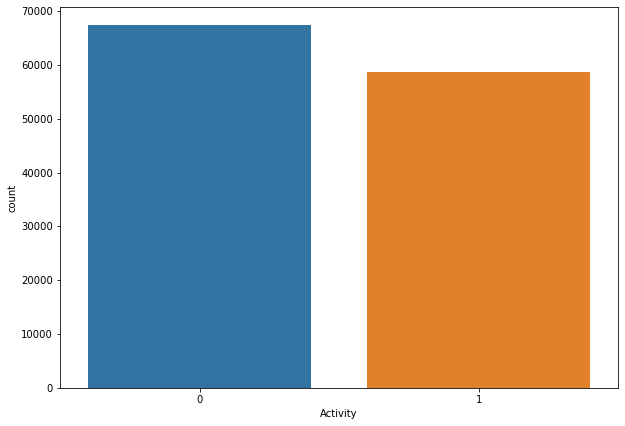

In [311]:
sn.countplot(train_main['Activity'])

### 2. There should not be co-relation between independent variables

In [312]:
corrm=train_main.corr()
corrm

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
duration,1.000000,0.230055,0.149619,0.112167,-0.311612,-0.311478,-0.176113,-0.178284,0.060103,0.048283,...,-0.085581,-0.007929,0.081103,0.290879,-0.180047,-0.015694,0.016254,0.021484,0.130765,-0.013518
src_bytes,0.230055,1.000000,0.670545,0.762483,-0.486640,-0.052010,-0.641677,-0.649158,-0.325101,-0.355202,...,-0.333086,-0.104837,-0.026004,-0.066762,-0.658250,0.044681,0.024377,0.022606,0.834970,-0.049429
dst_bytes,0.149619,0.670545,1.000000,0.785083,-0.399192,0.013329,-0.525478,-0.531901,-0.280696,-0.303987,...,-0.273863,-0.078467,-0.025038,-0.089875,-0.541302,0.059897,0.012677,0.009664,0.692990,-0.040640
logged_in,0.112167,0.762483,0.785083,1.000000,-0.487019,-0.147705,-0.485208,-0.491636,-0.264727,-0.287214,...,-0.253209,-0.070580,-0.023150,-0.093418,-0.500442,0.052719,0.033628,0.019436,0.641738,-0.037575
count,-0.311612,-0.486640,-0.399192,-0.487019,1.000000,0.518895,0.515062,0.520674,-0.003384,0.074351,...,0.126381,0.056057,0.016658,-0.144118,0.528664,-0.054244,-0.033048,-0.017408,-0.513616,-0.054887
srv_count,-0.311478,-0.052010,0.013329,-0.147705,0.518895,1.000000,0.088461,0.084271,-0.157226,-0.205289,...,-0.147405,-0.018982,-0.026673,-0.161133,0.094110,-0.044839,-0.024375,-0.011760,0.063427,-0.052713
serror_rate,-0.176113,-0.641677,-0.525478,-0.485208,0.515062,0.088461,1.000000,0.980512,-0.206948,-0.224034,...,-0.191922,-0.068730,-0.017547,-0.085863,0.967226,0.045468,0.031025,0.008675,-0.743254,0.073391
srv_serror_rate,-0.178284,-0.649158,-0.531901,-0.491636,0.520674,0.084271,0.980512,1.000000,-0.208748,-0.225982,...,-0.193591,-0.069327,-0.017699,-0.086610,0.978286,0.038604,0.009974,0.006690,-0.749827,0.073513
rerror_rate,0.060103,-0.325101,-0.280696,-0.264727,-0.003384,-0.157226,-0.206948,-0.208748,1.000000,0.915603,...,0.728856,0.316718,0.003185,0.389132,-0.208652,-0.018187,-0.010718,-0.006655,-0.408718,-0.015665
srv_rerror_rate,0.048283,-0.355202,-0.303987,-0.287214,0.074351,-0.205289,-0.224034,-0.225982,0.915603,1.000000,...,0.834969,0.292536,0.001618,0.367470,-0.225879,-0.019689,-0.011603,-0.007205,-0.442636,-0.016959


In [313]:
## there should be a co-relation between dependent and independent variables
corr_Y_X= corrm[(corrm.Activity<0.1) & (corrm.Activity >-0.1)].T.columns
corr_Y_X

Index(['srv_count', 'srv_diff_host_rate', 'protocol_type_tcp', 'flag_RSTO',
       'flag_RSTOS0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SH'],
      dtype='object')

In [314]:
train_main=train_main.drop(columns=corr_Y_X)

In [315]:
## there should be no relation between x variables
corr_x=train_main.corr()
corr_x_x=corr_x.unstack().sort_values().drop_duplicates().reset_index()
corr_x_x=corr_x_x.loc[(corr_x_x[0]>0.90) | (corr_x_x[0]<-0.90)]['level_0'].drop_duplicates()
corr_x_x

288                 rerror_rate
289             srv_rerror_rate
290        dst_host_serror_rate
291             srv_serror_rate
292                 serror_rate
295    dst_host_srv_serror_rate
296                     flag_S0
300                    duration
Name: level_0, dtype: object

In [316]:
corr_x_x=['rerror_rate','srv_rerror_rate','dst_host_serror_rate','srv_serror_rate','serror_rate','dst_host_srv_serror_rate',
          'flag_S0','duration']

In [317]:
## Dropping variables on basis of high correlation between independent variables.
train_main=train_main.drop(columns=corr_x_x)

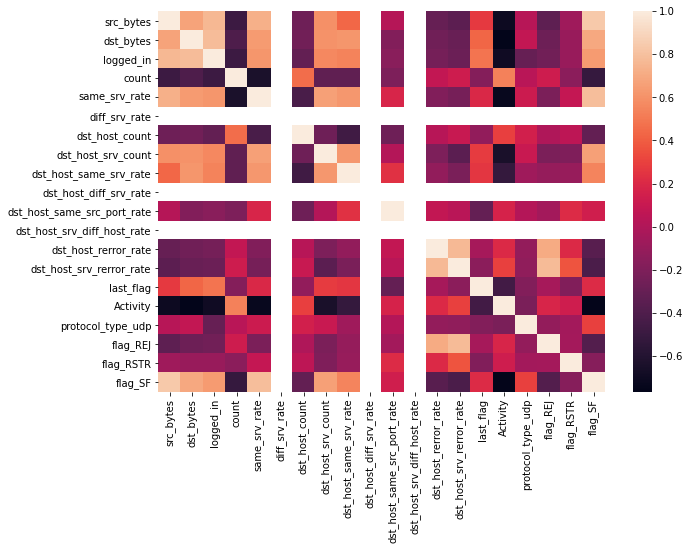

In [318]:
## Graphical representation using heat map
sn.heatmap(train_main.corr())

In [ ]:
## Dropping variables on basis of hign co-relation between independent variables using heatmap.
colss=['diff_srv_rate','dst_host_diff_srv_rate','dst_host_srv_diff_host_rate']
train_main= train_main.drop(columns=colss)

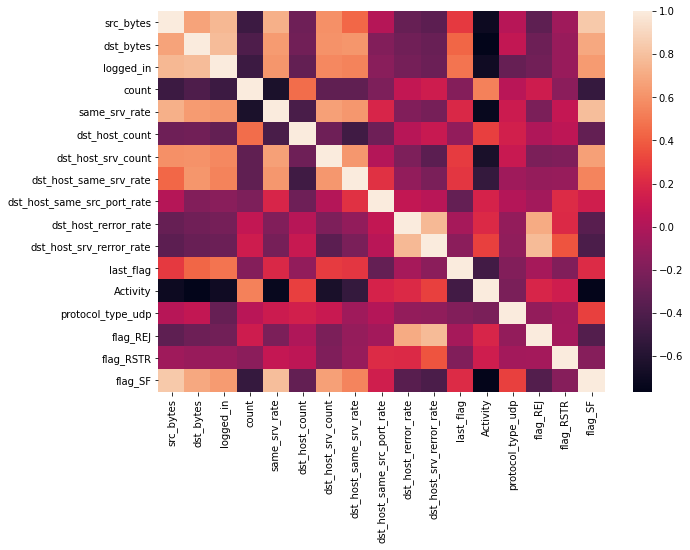

In [321]:
sn.heatmap(train_main.corr())

In [97]:
## Now, we have prepared our data 
train_main.head()

,src_bytes,dst_bytes,logged_in,count,same_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,Activity,protocol_type_udp,flag_REJ,flag_RSTR,flag_SF
0,3,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1
1,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,2,0,1,1,0,0,0,0,1,1,0,0,0,0
3,2,3,1,1,1,0,2,1,0,0,0,2,0,0,0,0,1
4,2,2,1,2,1,1,2,1,0,0,0,2,0,0,0,0,1


In [98]:
train_main.shape

(125973, 17)

In [99]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   src_bytes                    125973 non-null  int32
 1   dst_bytes                    125973 non-null  int32
 2   logged_in                    125973 non-null  int32
 3   count                        125973 non-null  int32
 4   same_srv_rate                125973 non-null  int32
 5   dst_host_count               125973 non-null  int32
 6   dst_host_srv_count           125973 non-null  int32
 7   dst_host_same_srv_rate       125973 non-null  int32
 8   dst_host_same_src_port_rate  125973 non-null  int32
 9   dst_host_rerror_rate         125973 non-null  int32
 10  dst_host_srv_rerror_rate     125973 non-null  int32
 11  last_flag                    125973 non-null  int32
 12  Activity                     125973 non-null  int32
 13  protocol_type_udp            

## BINOMIAL CLASSIFICATION

### MODEL BUILDING USING LOGISTIC REGRESSION TECHNIQUE

In [322]:
## Splitting the data into training and testing data set

from sklearn.model_selection import train_test_split
train,test=train_test_split(train_main, test_size=0.3, random_state=42)

In [323]:
print("train.shape: ", train.shape)
print("test.shape: ", test.shape)

train.shape:  (88181, 17)
test.shape:  (37792, 17)


In [324]:
## Feature selection
feature_cols = train_main.columns.difference(['Activity','logged_in','flag_SF', 'dst_host_srv_rerror_rate',
                                               'same_srv_rate', 'dst_bytes','same_srv_rate']) ## Dropping other varaiables on basis of high VIF

In [231]:
# gathering features
my_formula = "Activity ~" + "+".join(feature_cols)

In [232]:
# importing the required libraries for model building
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

lm = sm.logit(formula = my_formula, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.150564
         Iterations 9


In [233]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Activity   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88169
Method:                           MLE   Df Model:                           11
Date:                Tue, 07 Jul 2020   Pseudo R-squ.:                  0.7820
Time:                        14:02:46   Log-Likelihood:                -13277.
converged:                       True   LL-Null:                       -60894.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.8649      0.060     47.909      0.000       2.748       2.982
count                           1.2749      0.018     70.895      0.000       1.240       1.310
dst_host_count                  0.5936      0.055     10.856      0.000       0.486       0.701
dst_host_rerror_rate            1.1264      0.121      9.278      0.000       0.888       1.364
dst_host_same_src_port_rate     3.4333      0.059     58.575      0.000       3.318       3.548
dst_host_same_srv_rate         -1.4738      0.052    -28.309      0.000      -1.576      -1.372
dst_host_srv_count             -1.0791      0.026    -41.389      0.000      -1.130      -1.028
flag_REJ                       -1.0045      0.101     -9.922      0.000      -1.203      -0.806
flag_RSTR                       2.2887      0.184     12.453      0.000       1.928       2.649
last_flag                      -1.6938      0.026    -66.202      0.000      -1.744      -1.644
protocol_type_udp              -3.8975      0.052    -75.203      0.000      -3.999      -3.796
src_bytes                      -1.1147      0.016    -70.968      0.000      -1.146      -1.084
===============================================================================================
"""

In [234]:
# Variation Inflation Factor- to check multicolinearity between variables on baiss of high VIF value(insignificance of variable)
## if the VIF is between 5-10, multicolinearity is likely present and we should consider dropping the variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X=dmatrices(my_formula, train, return_type= 'dataframe')

# For each X, calculate the VIF and create dataframe

dict= {'VIF': [variance_inflation_factor(X.values,i) for i in range(X.shape[1])],
      'features': (X.columns)}

vif=pd.DataFrame(dict)

vif.sort_values('VIF', ascending=False)

,VIF,features
0,15.710133,Intercept
3,2.316149,dst_host_rerror_rate
7,2.310770,flag_REJ
6,2.280603,dst_host_srv_count
5,2.157066,dst_host_same_srv_rate
11,2.012801,src_bytes
1,1.690820,count
2,1.574631,dst_host_count
4,1.429102,dst_host_same_src_port_rate
9,1.414925,last_flag


##### PREDICTIONS

In [235]:
train['train_pred']=lm.predict(train)
test['test_pred']=lm.predict(test)

##### CHECKING MODEL ACCURACY

In [236]:
from sklearn import metrics
print("ROC AUC Score of training data: ", (metrics.roc_auc_score(train['Activity'], train['train_pred'])))
print("ROC AUC Score of testing data: ", (metrics.roc_auc_score(test['Activity'], test['test_pred'])))

ROC AUC Score of training data:  0.9851642673113847
ROC AUC Score of testing data:  0.9858746768981459


#### The ROC AUC score is coming out to be good. Hence, we consider our model good.

## SOMER'S D
### Getting Somer's D value for each variable

In [237]:
somers_df=pd.DataFrame()

for cols in feature_cols:
    
    logreg= sm.logit(formula= str('Activity ~ ') + str(cols), data=train_main).fit()
    
    y_predict=pd.DataFrame(logreg.predict())
    
    y_predict.columns=['predicted_values']
    
    somers_d = 2* metrics.roc_auc_score(train_main['Activity'],y_predict)-1
    
    temp=pd.DataFrame([cols,somers_d]).T
    temp.columns= ['variable_name','somers_d']
    
    somers_df=pd.concat([somers_df, temp])
    

Optimization terminated successfully.
         Current function value: 0.531891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.645257
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669239
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675317
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.455590
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.673099
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.680423
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.580800
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.664989
  

In [238]:
somers_df.sort_values('somers_d', ascending=False)

,variable_name,somers_d
0,src_bytes,0.79834
0,dst_host_srv_count,0.710625
0,count,0.597937
0,dst_host_same_srv_rate,0.508155
0,last_flag,0.504306
0,dst_host_count,0.255017
0,protocol_type_udp,0.14099
0,dst_host_rerror_rate,0.111195
0,flag_REJ,0.10567
0,dst_host_same_src_port_rate,0.0951084


## DECILE ANALYSIS FOR CUT-OFF

In [239]:
train['Decile']=pd.qcut(train['train_pred'], 10, labels=False)

min_prob=train.groupby(['Decile'])['train_pred'].min().round(2).sort_index(ascending=False)
max_prob=train.groupby(['Decile'])['train_pred'].max().round(2).sort_index(ascending=False)
total_count=train.groupby(['Decile'])['Activity'].count().sort_index(ascending=False)
ones= train.groupby(['Decile'])['Activity'].sum().sort_index(ascending=False)

decile_analysis_train=pd.concat([min_prob, max_prob, ones, total_count-ones, total_count], axis=1)
decile_analysis_train.columns=['min_prob','max_prob','1s','0s','total']

In [240]:
decile_analysis_train.reset_index()

,Decile,min_prob,max_prob,1s,0s,total
0,9,1.00,1.00,8372,1,8373
1,8,0.99,1.00,6665,28,6693
2,7,0.96,0.99,9435,182,9617
3,6,0.83,0.96,9454,480,9934
4,5,0.27,0.83,5525,3928,9453
5,4,0.04,0.26,820,6596,7416
6,3,0.01,0.04,381,9456,9837
7,2,0.01,0.01,250,8958,9208
8,1,0.00,0.01,19,8525,8544
9,0,0.00,0.00,0,9106,9106


In [241]:
decile_analysis_train['perc_D']= round((decile_analysis_train['1s']*100)/(decile_analysis_train['1s'].sum()),2)
decile_analysis_train['perc_ND']= round((decile_analysis_train['0s']*100)/(decile_analysis_train['0s'].sum()),2)

decile_analysis_train['cum_perc_D']=decile_analysis_train['perc_D'].cumsum()
decile_analysis_train['cum_perc_ND']=decile_analysis_train['perc_ND'].cumsum()

In [243]:
## K-S Score for the goodness of fitness test

decile_analysis_train['KS_Score']=decile_analysis_train['cum_perc_D']-decile_analysis_train['cum_perc_ND']

## Now, I can See the maximum value lies in first five deciles, we will take the min prob as cut-off of 0.27

decile_analysis_train.reset_index()

,Decile,min_prob,max_prob,1s,0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND,KS_Score
0,9,1.00,1.00,8372,1,8373,20.46,0.00,20.46,0.00,20.46
1,8,0.99,1.00,6665,28,6693,16.29,0.06,36.75,0.06,36.69
2,7,0.96,0.99,9435,182,9617,23.06,0.39,59.81,0.45,59.36
3,6,0.83,0.96,9454,480,9934,23.10,1.02,82.91,1.47,81.44
4,5,0.27,0.83,5525,3928,9453,13.50,8.31,96.41,9.78,86.63
5,4,0.04,0.26,820,6596,7416,2.00,13.96,98.41,23.74,74.67
6,3,0.01,0.04,381,9456,9837,0.93,20.01,99.34,43.75,55.59
7,2,0.01,0.01,250,8958,9208,0.61,18.95,99.95,62.70,37.25
8,1,0.00,0.01,19,8525,8544,0.05,18.04,100.00,80.74,19.26
9,0,0.00,0.00,0,9106,9106,0.00,19.27,100.00,100.01,-0.01


### Now again we will again check the cut-off on testing data

In [245]:
test['Decile']= pd.qcut(test['test_pred'],10, labels=False)

min_prob= round((test.groupby(['Decile'])['test_pred'].min()),2).sort_index(ascending=False)
max_prob= round((test.groupby(['Decile'])['test_pred'].max()),2).sort_index(ascending=False)
total_count= test.groupby(['Decile'])['Activity'].count().sort_index(ascending=False)
ones=test.groupby(['Decile'])['Activity'].sum().sort_index(ascending=False)

decile_analysis_test=pd.concat([min_prob, max_prob,ones,total_count-ones,total_count], axis=1)
decile_analysis_test.columns=['min_prob','max_prob','1s','0s','total']
decile_analysis_test.reset_index()

decile_analysis_test['perc_D']=round(((decile_analysis_test['1s']*100)/(decile_analysis_test['1s'].sum())),2)
decile_analysis_test['perc_ND']=round(((decile_analysis_test['0s']*100)/(decile_analysis_test['0s'].sum())),2)

decile_analysis_test['cum_perc_D']= decile_analysis_test['perc_D'].cumsum()
decile_analysis_test['cum_perc_ND']= decile_analysis_test['perc_ND'].cumsum()

decile_analysis_test.reset_index()


## Now we will apply KS test for goodness of fitness test

decile_analysis_test['KS_Score']= round((decile_analysis_test['cum_perc_D']-decile_analysis_test['cum_perc_ND']),2)
decile_analysis_test.reset_index()

## We can see that the maximum values lies in first five deciles.
## Hence , we will take the cut off as 0.27 

,Decile,min_prob,max_prob,1s,0s,total,perc_D,perc_ND,cum_perc_D,cum_perc_ND,KS_Score
0,9,1.00,1.00,3534,4,3538,19.96,0.02,19.96,0.02,19.94
1,8,0.99,1.00,2913,10,2923,16.45,0.05,36.41,0.07,36.34
2,7,0.96,0.99,4071,79,4150,22.99,0.39,59.40,0.46,58.94
3,6,0.83,0.96,4163,216,4379,23.51,1.08,82.91,1.54,81.37
4,5,0.27,0.83,2423,1477,3900,13.68,7.35,96.59,8.89,87.70
5,4,0.04,0.27,362,3038,3400,2.04,15.13,98.63,24.02,74.61
6,3,0.01,0.04,161,3302,3463,0.91,16.44,99.54,40.46,59.08
7,2,0.01,0.01,78,3151,3229,0.44,15.69,99.98,56.15,43.83
8,1,0.00,0.01,4,5022,5026,0.02,25.01,100.00,81.16,18.84
9,0,0.00,0.00,0,3784,3784,0.00,18.84,100.00,100.00,-0.00


In [246]:
## Doing the final prediction

train['predicted']=train['train_pred'].apply(lambda x: 1 if x>0.27 else 0)
test['predicted']=test['test_pred'].apply(lambda x: 1 if x>0.27 else 0)

## FURTHER EVALUATION

In [247]:
cm=metrics.confusion_matrix(train['Activity'], train['predicted'])
cm

array([[43147,  4113],
       [ 1472, 39449]], dtype=int64)

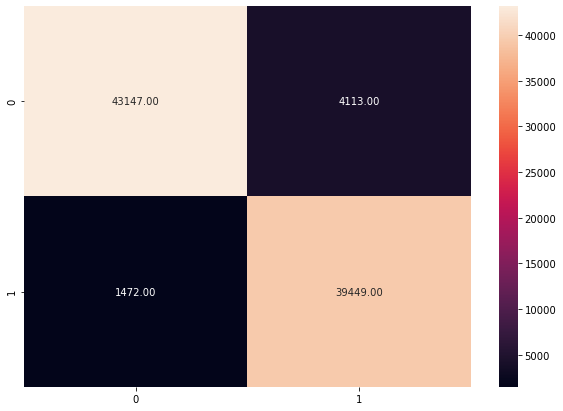

In [248]:
### Visualising using heat map
sn.heatmap(cm, annot=True, fmt='.2f')

In [249]:
## Accuracy-
print("accuracy score: ", (metrics.accuracy_score(train['Activity'],train['predicted'])))

accuracy score:  0.9366643608033477


In [250]:
# precision and recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(train['Activity'], train['predicted']))
print("Recall:",recall_score(train['Activity'], train['predicted']))

Precision: 0.9055828474358386
Recall: 0.9640282495540187


In [251]:
print("Roc auc score ;", (metrics.roc_auc_score(train['Activity'],train['predicted'])))

Roc auc score ; 0.9384995246923712


## TESTING DATA

In [252]:
cm=metrics.confusion_matrix(test['Activity'], test['predicted'])
cm

array([[18301,  1782],
       [  605, 17104]], dtype=int64)

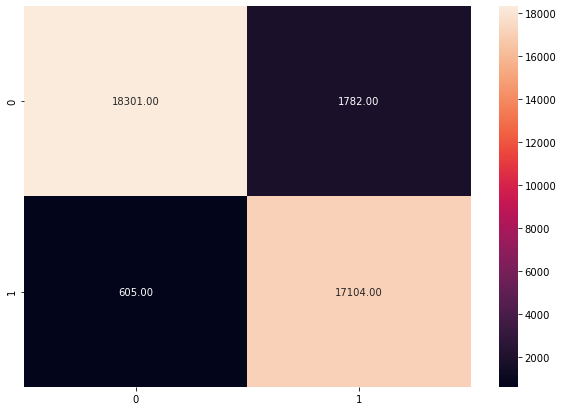

In [253]:
sn.heatmap(cm, annot=True, fmt='0.2f')

In [257]:
## Accuracy
metrics.accuracy_score(test['Activity'], test['predicted'])

0.936838484335309

In [258]:
# precision and recall
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(test['Activity'], test['predicted']))
print("Recall:",recall_score(test['Activity'], test['predicted']))

Precision: 0.9056443926718204
Recall: 0.9658365802699193


In [259]:
print('roc_auc_score of testing dataset:', metrics.roc_auc_score(test['Activity'], test['predicted']))

roc_auc_score of testing dataset: 0.9385524085435639


## Now, apply the model on new testing data set to predict whether activity is normal or attack

In [437]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [176]:
test_data.shape

(22544, 43)

In [261]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [438]:
## Now, we will split the testing data
test_data_cont=test_data.loc[:, ((test_data.dtypes=='int64')|(test_data.dtypes=='float64')|(test_data.dtypes=='int32')|(test_data.dtypes=='float32'))]
test_data_cat=test_data.loc[:, (test_data.dtypes=='object')]

In [439]:
data= ['duration','src_bytes','dst_bytes','count','srv_count','dst_host_count','dst_host_srv_count','last_flag']
fs=test_data_cont.copy()

for x in data:
    fs.loc[(fs[x] <= fs[x].quantile(0.25)), x]=0
    fs.loc[(fs[x] > fs[x].quantile(0.25)) & (fs[x]<= fs[x].quantile(0.50)), x]=1
    fs.loc[(fs[x] > fs[x].quantile(0.50)) & (fs[x]<= fs[x].quantile(0.75)), x]=2
    fs.loc[(fs[x] > fs[x].quantile(0.75)) & (fs[x]<= fs[x].quantile(0.95)), x]=3
    fs.loc[(fs[x] > fs[x].quantile(0.95)), x]=4
    
test_data_cont=fs.copy()

In [440]:
test_data_cont.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,0,0,0,0,0,0,0,0,0,...,0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,2
2,3,3,0,0,0,0,0,0,0,0,...,1,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,2
3,0,1,0,0,0,0,0,0,0,0,...,1,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,3,0,1,0,0,0,0,0,0,0,...,1,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


## Now creating dummy variables on testing data

In [441]:
def create_dummies(df,colname):
    col_dummies=pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df=pd.concat([df,col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [442]:
for c_feature in ['protocol_type', 'flag']:
    test_data_cat[c_feature]=test_data_cat[c_feature].astype('category')
    test_data_cat=create_dummies( test_data_cat, c_feature)

In [443]:
test_data_cat=test_data_cat[test_data_cat.columns.difference(['service','attack'])]
test_data_cat.shape

(22544, 12)

In [444]:
## Now conactenating continous and categorical dataset for test dataframe
test_main=pd.concat([test_data_cont,test_data_cat], axis=1)

In [462]:
test_main.shape

(22544, 51)

In [446]:
for i in test_main:
    test_main[i]=test_main[i].astype(int)

In [270]:
## Predicted probablities on testing data
test_main['test_pred']=lm.predict(test_main)

In [271]:
## Doing the final predictions
test_main['Activity']=test_main['test_pred'].apply(lambda x: 1 if x >0.27 else 0)

In [272]:
test_main['Activity'].value_counts()

1    12422
0    10122
Name: Activity, dtype: int64

## We can clearly see that there are 12422 anamolies in the data

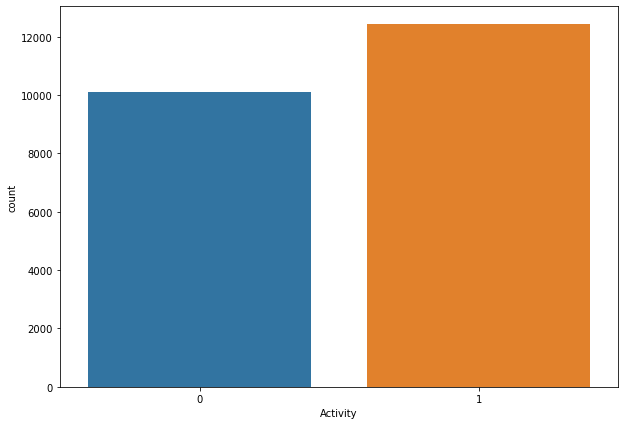

In [202]:
# the graphical representation of the count of observations of each activity using bars.
sn.countplot(test_main.Activity)
plt.show()

## Thus, the factors affecting the Activity are:

##### dst_host_rerror_rate : The percentage of connections that have activated the flag (4) REJ, among the connections (32) aggregated in dst_host_count
##### flag_REJ : Status of the connection REJ
##### dst_host_srv_count : Number of connections having the same port number
##### dst_host_same_srv_rate : The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32)
##### src_bytes : Number of data bytes transferred from source to destination in single connection
##### count : Number of connections to the same destination host as the current connection in the past two seconds
##### dst_host_count : Number of connections having the same destination host IP address
##### dst_host_same_src_port_rate: Percent of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount(33)
##### flag_RSTR : Status of the connection RSTR
##### protocol_type_udp : Protocol used in the connection UDP
##### last_flag

## MUTINOMIAL CLASSIFICATION

In [361]:
col=['Activity','logged_in','flag_SF', 'dst_host_srv_rerror_rate','same_srv_rate', 'dst_bytes','same_srv_rate']


In [ ]:
train_main2=train_main.drop(columns=col)

In [364]:
train_main.columns

Index(['src_bytes', 'count', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_rerror_rate', 'last_flag', 'protocol_type_udp', 'flag_REJ',
       'flag_RSTR', 'attack', 'attack_class', 'attack_class_2'],
      dtype='object')

In [365]:
train_main['attack']=train_data['attack']
train_main['attack'].unique() ## Defining Target Variable

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [366]:
train_main['attack_class']=np.where((train_main['attack'].isin(['back','land','neptune','pod','smurf','teardrop'])==True),'DoS',
                     np.where((train_main['attack'].isin (['satan','ipsweep','nmap','portsweep'])==True),'Probe',
                              np.where((train_main['attack'].isin(['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy'])==True),'R2L',
                                       np.where((train_main['attack'].isin(['buffer_overflow','loadmodule','rootkit','perl'])==True),'U2R','normal'))))

In [367]:
train_main['attack_class'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [368]:
train_main['attack_class_2']=np.where((train_main['attack_class']=='normal'), 0,
                              np.where((train_main['attack_class']=='DoS'), 1,
                                      np.where((train_main['attack_class']=='R2L'), 2,
                                              np.where((train_main['attack_class']=='Probe'), 3,
                                                      np.where((train_main['attack_class']=='U2R'), 4,'')))))

In [369]:
train_main['attack_class_2'].unique()

array(['0', '1', '2', '3', '4'], dtype=object)

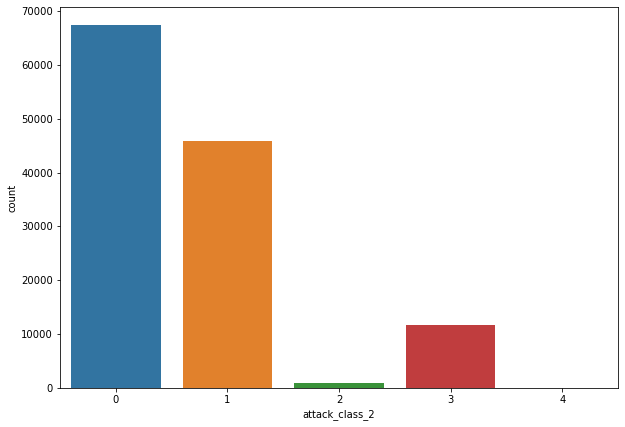

In [370]:
## Graphical Represent of attack_class_2
sn.countplot(x='attack_class_2', data=train_main)

In [372]:
train_main.columns
train_main2=train_main

In [375]:
train_main2.columns

Index(['src_bytes', 'count', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_rerror_rate', 'last_flag', 'protocol_type_udp', 'flag_REJ',
       'flag_RSTR', 'attack', 'attack_class', 'attack_class_2'],
      dtype='object')

In [466]:
f_c=train_main.columns.difference(['attack', 'attack_class', 'attack_class_2'])
f_c

Index(['count', 'dst_host_count', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_REJ', 'flag_RSTR', 'last_flag',
       'protocol_type_udp', 'src_bytes'],
      dtype='object')

In [378]:
X=train_main2[f_c] ## feature variable
y=train_main2['attack_class_2']

In [483]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y ,test_size=0.25, random_state=42)

In [484]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [485]:
y_test_pred=logreg.predict(X_test)

In [486]:
c_matrix_test=metrics.confusion_matrix(y_test, y_test_pred)
c_matrix_test

array([[16243,   331,    26,   174,     0],
       [  500, 10935,    15,    34,     0],
       [  110,     1,   143,    20,     0],
       [  177,   141,     0,  2629,     0],
       [    5,     0,     2,     8,     0]], dtype=int64)

In [487]:
## Checking accuracy of the model for training and testing data

print("Accuracy score : ", (metrics.accuracy_score(y_test,y_test_pred)))

Accuracy score :  0.9509747888486696


In [488]:
# checking how much area is under the ROC curve

from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_test_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_test_pred = lb.transform(y_test_pred)
    return metrics.roc_auc_score(y_test, y_test_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_test_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.8247442768347447


### Now, we will again apply the model on new testing data

In [489]:
test_main=test_main[['count', 'dst_host_count', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'flag_REJ', 'flag_RSTR', 'last_flag',
       'protocol_type_udp', 'src_bytes']]

In [490]:
test_main['predicted']=logreg.predict(test_main)

In [491]:
test_main.predicted.unique()

array(['1', '0', '3', '2'], dtype=object)

In [492]:
# Assigning orignal names to attack class

w = np.where
n = test_main['predicted']

test_main['attack_class'] = w((n == '0'), 'Normal', w((n == '1'), 'DoS', w((n == '2'), 'Probe', w((n == '3'), 'R2L', ''))))


In [493]:
test_main.attack_class.value_counts()

Normal    13018
DoS        7119
R2L        2341
Probe        66
Name: attack_class, dtype: int64